In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### A_Z Handwritten dataset

In [7]:
#dataset https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format
data_letters = pd.read_csv('.//Data//A_Z Handwritten Data.csv').astype('int32')

In [8]:
data_letters.rename(columns={'0':'label'}, inplace=True)

In [9]:
X_letters_full = data_letters.drop('label', axis=1).to_numpy()
y_letters_full = data_letters['label'].to_numpy()

In [10]:
X_letters_full = X_letters_full.reshape(X_letters_full.shape[0],28,28)

0


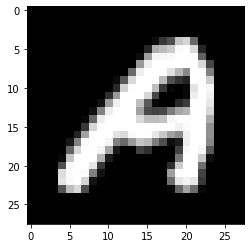

In [11]:
print(y_letters_full[3001])
plt.imshow(X_letters_full[3001], cmap='gray')
plt.show()

### Mnist dataset

In [12]:
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [13]:
X_mnist_full = np.concatenate((X_mnist_train, X_mnist_test))
y_mnist_full = np.concatenate((y_mnist_train, y_mnist_test))

In [14]:
np.unique(y_mnist_full).shape

(10,)

9


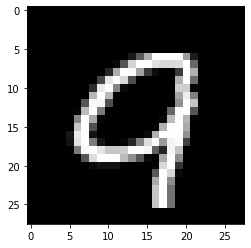

In [15]:
print(y_mnist_full[3000])
plt.imshow(X_mnist_full[3000], cmap='gray')
plt.show()

### Full handwritten letters + numbers data

y values: 
- 0-9 - numbers 0-9
- 10-35 - letters A-Z

In [16]:
y_letters_full = y_letters_full+10

print(np.unique(y_mnist_full))
print(np.unique(y_letters_full))

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]


In [17]:
X_data_full = np.concatenate((X_mnist_full, X_letters_full))
y_data_full = np.concatenate((y_mnist_full, y_letters_full))

In [18]:
np.unique(y_data_full).shape

(36,)

In [19]:
permutation = np.random.permutation(X_data_full.shape[0])

X_data_full = X_data_full[permutation]
y_data_full = y_data_full[permutation]

In [20]:
X_data_full = X_data_full / 255.0

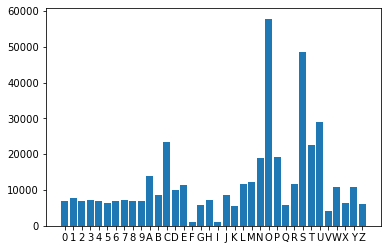

In [21]:
import string

unique_values, frequency_count = np.unique(y_data_full, return_counts=True)
label = ["%d" %i for i in range(0,10)] + list(string.ascii_uppercase)
plt.bar(label, frequency_count)
plt.show()

### Model training

- train set 60%
- validation set 20%
- test set 20%

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_full, y_data_full, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)

In [23]:
np.unique(y_train).shape

(36,)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(265470, 28, 28)
(88490, 28, 28)
(88490, 28, 28)


In [25]:
y_train

array([ 5, 27, 13, ..., 24,  0, 13], dtype=int32)

In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)
y_valid_cat = keras.utils.to_categorical(y_valid)

In [27]:
y_train_cat.shape[1]

36

In [31]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=X_train.shape[1:]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(np.unique(y_data_full).size, activation='softmax')
# ])

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=X_train.shape[1:]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(y_train_cat.shape[1], activation='softmax')
])

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
callbacks = [keras.callbacks.EarlyStopping(patience=10)]

In [ ]:
model.fit(X_train, y_train_cat, epochs=100, batch_size=32,
                   validation_data=(X_valid, y_valid_cat),
                   callbacks=callbacks)

Epoch 1/100
8296/8296 [==============================] - 57s 7ms/step - loss: 0.5522 - accuracy: 0.8477 - val_loss: 0.1634 - val_accuracy: 0.9606
Epoch 2/100
8296/8296 [==============================] - 48s 6ms/step - loss: 0.2414 - accuracy: 0.9392 - val_loss: 0.1130 - val_accuracy: 0.9723
Epoch 3/100
8296/8296 [==============================] - 48s 6ms/step - loss: 0.1996 - accuracy: 0.9508 - val_loss: 0.1116 - val_accuracy: 0.9732
Epoch 4/100
8296/8296 [==============================] - 48s 6ms/step - loss: 0.1797 - accuracy: 0.9564 - val_loss: 0.1136 - val_accuracy: 0.9742
Epoch 5/100
8296/8296 [==============================] - 48s 6ms/step - loss: 0.1695 - accuracy: 0.9591 - val_loss: 0.1264 - val_accuracy: 0.9725
Epoch 6/100
8296/8296 [==============================] - 48s 6ms/step - loss: 0.1655 - accuracy: 0.9603 - val_loss: 0.1153 - val_accuracy: 0.9743
Epoch 7/100
8296/8296 [==============================] - 48s 6ms/step - loss: 0.1610 - accuracy: 0.9614 - val_loss: 0.1091 -

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.save('.//Models//mnist_alphabet')